**Programming Assignment 2**

LINEAR REGRESSION

,Metric,Value
0,Validation MSE,10.141296
1,Test MSE,7.902088


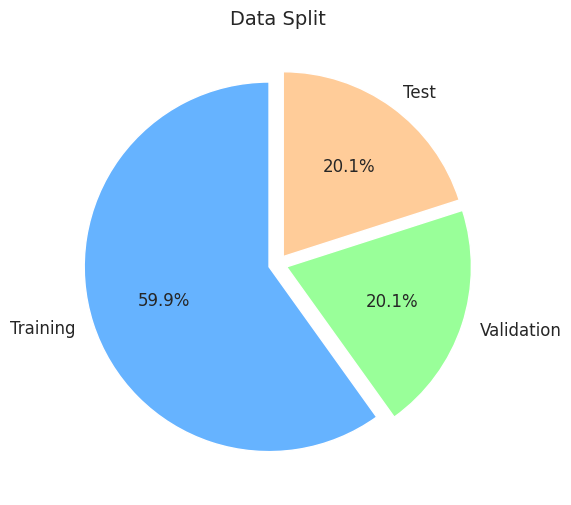

The code splits the data into three parts: training, validation, and testing. The training part is used to teach the model, the validation part is used to improve it,
and the testing part checks how well it works on new data. `random_state=42` makes sure the split is the same every time.


In [33]:
!pip install openpyxl > /dev/null
!pip install colorama > /dev/null

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
data = pd.read_excel(url)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = data['Y1']  # Target (Heating Load)

# 2. Split the data
# First split into train and remaining (validation + test)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)
# Then split the remaining into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate the model on the validation set
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)


# 5. Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
    'Metric': ['Validation MSE', 'Test MSE'],
    'Value': [mse, test_mse]
}

results_df = results_df[(results_df['Value'] <= 0) | (results_df['Value'] >= 1)]
display(results_df)
# 6. Visualization: 2D Pie chart of data splits
# Pie charts are inherently 2D and are not suitable for 3D projection
sizes = [len(X_train), len(X_valid), len(X_test)]
labels = ['Training', 'Validation', 'Test']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(6, 6))

# Explode the slices slightly for better visibility
explode = (0.05, 0.05, 0.05)

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 12})

ax.set_title('Data Split', fontsize=14)

plt.show()

print("The code splits the data into three parts: training, validation, and testing. The training part is used to teach the model, the validation part is used to improve it,")
print("and the testing part checks how well it works on new data. `random_state=42` makes sure the split is the same every time." )


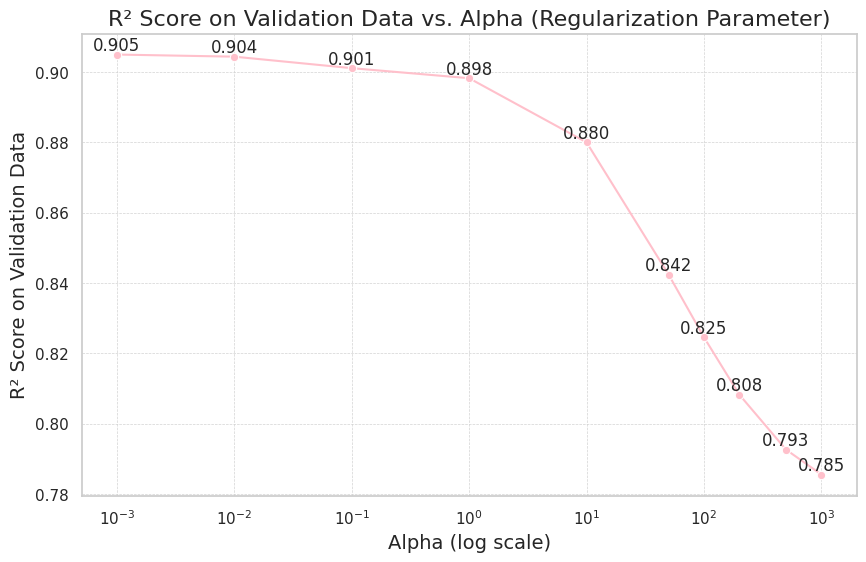

Best alpha: 0.001
This part of the code improves the linear regression model by using Ridge Regression and trying different alpha values to find the best one for regularization.


In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import seaborn as sns # Importing seaborn for plotting
import matplotlib.pyplot as plt

# Define 10 different Ridge regularization parameters (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000]
validation_r2_scores = []

# Loop over each alpha and train the model, evaluate on validation data
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Changed X_val to X_valid
    y_val_pred = ridge.predict(X_valid)

    r2 = r2_score(y_valid, y_val_pred)
    validation_r2_scores.append(r2)

# Visualization: Plot R² scores for different regularization parameters
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Change line color to red
sns.lineplot(x=alphas, y=validation_r2_scores, marker='o', color='pink')

plt.xscale('log')
plt.title('R² Score on Validation Data vs. Alpha (Regularization Parameter)', fontsize=16)
plt.xlabel('Alpha (log scale)', fontsize=14)
plt.ylabel('R² Score on Validation Data', fontsize=14)

# Customize grid color to a shade of gray that complements red
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add data point labels
for i, alpha in enumerate(alphas):
    plt.text(alpha, validation_r2_scores[i], f'{validation_r2_scores[i]:.3f}', ha='center', va='bottom')

plt.show()
# Best alpha
best_alpha = alphas[validation_r2_scores.index(max(validation_r2_scores))]
print(f'Best alpha: {best_alpha}')

print("This part of the code improves the linear regression model by using Ridge Regression and trying different alpha values to find the best one for regularization.")




## **Final evaluation on the test data**

,Metric,Value
0,R² (Training),0.917780
1,R² (Validation),0.907799
2,R² (Test),0.919095


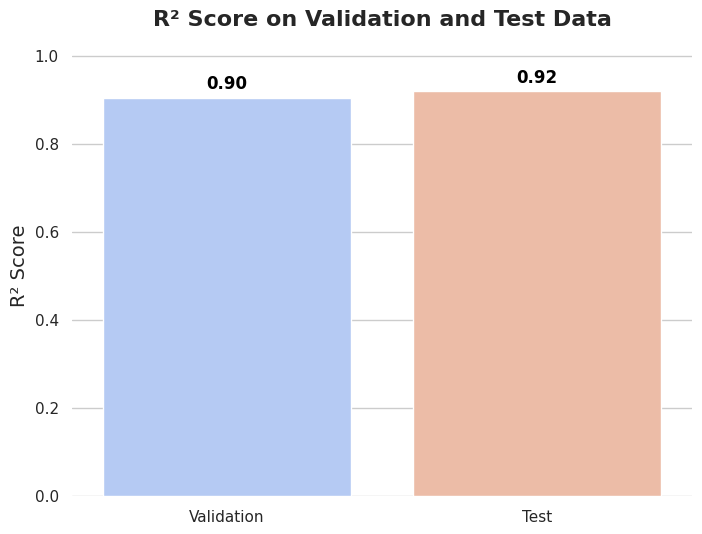

This code makes a bar chart to show and compare the R² scores from the validation set (for tuning) and the test set (for final checking).


In [29]:
# Train the Ridge model using the best alpha on the combined training and validation sets
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))

# Predict on test set and evaluate
y_test_pred = best_ridge.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

results = {
    'Metric': ['R² (Training)', 'R² (Validation)', 'R² (Test)'],
    'Value': [train_r2, val_r2, test_r2]
}
results_df = pd.DataFrame(results)
display(results_df)

# Visualization: Bar chart showing R² score for validation and test sets
plt.figure(figsize=(8, 6))

# Use Seaborn for a more stylish bar plot
sns.set_theme(style="whitegrid")  # Set a theme for better aesthetics
ax = sns.barplot(x=['Validation', 'Test'], y=[max(validation_r2_scores), test_r2],
                 hue=['Validation', 'Test'], palette="warm", legend=False)

plt.title('R² Score on Validation and Test Data', fontsize=16, fontweight='bold')  # Bold title
plt.ylabel('R² Score', fontsize=14)

# Annotating the bars with improved formatting
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 1.05)  # Set y-axis limits for better visualization
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

plt.show()

print('This code makes a bar chart to show and compare the R² scores from the validation set (for tuning) and the test set (for final checking).')

# The best model's coefficients, intercept, and R² scores for the training, validation, and test sets.

,Metric,Value
0,Intercept,83.033871
1,R² (Training),0.917780
2,R² (Validation),0.907799
3,R² (Test),0.919095
4,Coefficient (X1),-65.536657
5,Coefficient (X2),-0.061266
6,Coefficient (X3),0.033542
7,Coefficient (X4),-0.047404
8,Coefficient (X5),4.355032
9,Coefficient (X6),-0.006460


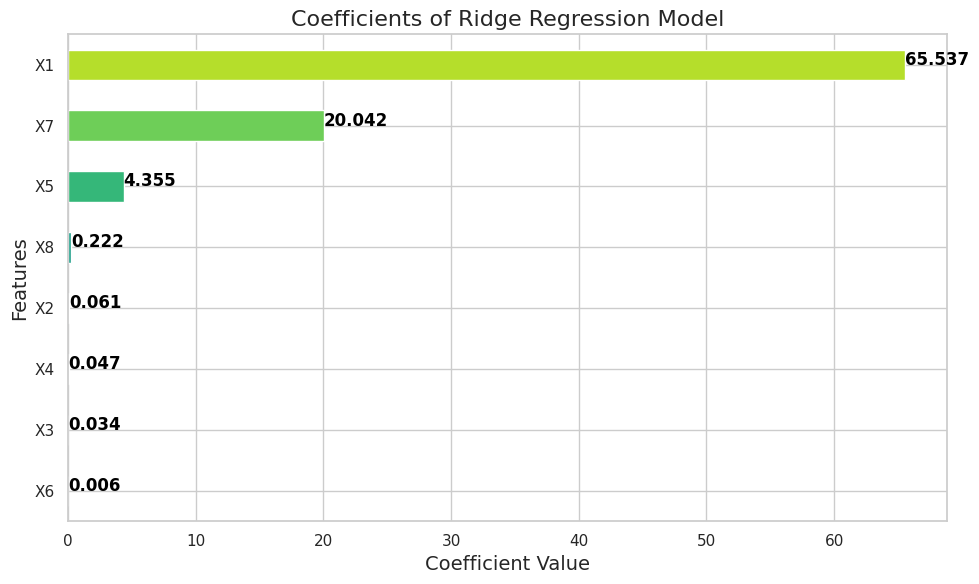

This part of the code shows how important each feature is by displaying its coefficient, checks how well the model works using R² scores, and uses a bar chart to show the
effect of each feature.


In [20]:
# Coefficients and intercept of the best model
import pandas as pd

# Create a dictionary to store the data
data = {
    'Metric': ['Intercept', 'R² (Training)', 'R² (Validation)', 'R² (Test)'],
    'Value': [best_ridge.intercept_, train_r2, val_r2, test_r2]
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(data)

# Add coefficients to the DataFrame
for i, coef in enumerate(best_ridge.coef_):
    df_metrics.loc[len(df_metrics)] = [f'Coefficient (X{i+1})', coef]

# Display the table
display(df_metrics)

# Visualization: Coefficients of the model with enhancements
import numpy as np  # Import numpy and assign it the alias 'np'
coefficients = pd.Series(best_ridge.coef_, index=X.columns)
plt.figure(figsize=(10, 6))

# Create a color palette with distinct colors
colors = sns.color_palette("viridis", len(coefficients))

# Sort coefficients by absolute value for better visualization
coefficients = coefficients.abs().sort_values() #Get absolute values and sort

# Create the horizontal bar plot
ax = coefficients.plot(kind='barh', color=colors)

# Add value labels to each bar
for i, v in enumerate(coefficients):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight='bold') # Adjusted for positive values

plt.title('Coefficients of Ridge Regression Model', fontsize=16) #Updated title
plt.xlabel('Coefficient Value', fontsize=14) #Updated x-axis label
plt.ylabel('Features', fontsize=14)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

print("This part of the code shows how important each feature is by displaying its coefficient, checks how well the model works using R² scores, and uses a bar chart to show the")
print('effect of each feature.')

#  Top 5 features based on their coefficients

,Feature,Coefficient
1,X1,65.536657
2,X7,20.042201
3,X5,4.355032
4,X8,0.221753
5,X2,0.061266


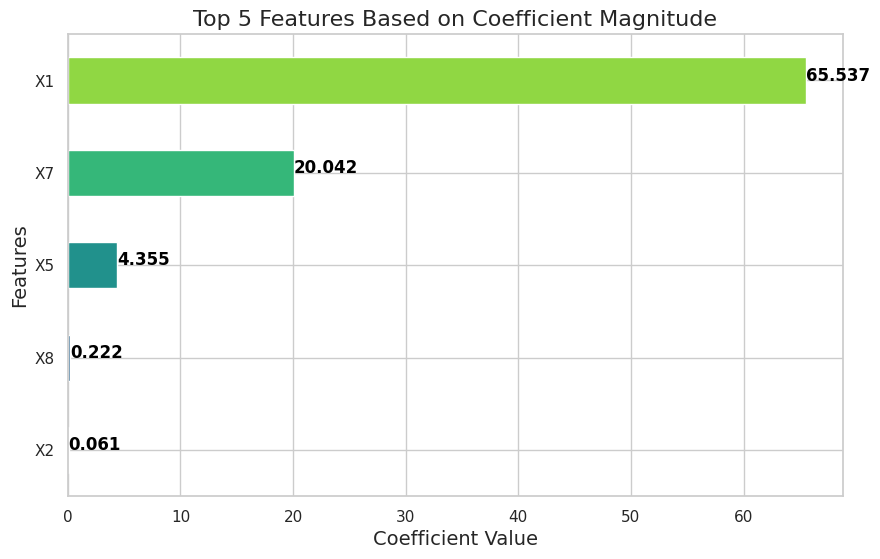

This code snippet helps identify and visualize the top 5 most important features in the Ridge Regression model by looking at the coefficients given to each feature.


In [25]:
# Get the top 5 features based on the absolute values of the coefficients
top_5_features = coefficients.abs().nlargest(5)

# Create a DataFrame for the top 5 features and their coefficients
top_5_df = pd.DataFrame({'Feature': top_5_features.index, 'Coefficient': top_5_features.values})
top_5_df.index = range(1, len(top_5_df) + 1)

# Display the table
display(top_5_df)

# Visualization: Top 5 features with their coefficient values and enhancements
plt.figure(figsize=(10, 6))

# Generate a distinct color for each bar
colors = sns.color_palette('coolwarm', len(top_5_features))

# Create the horizontal bar plot
ax = top_5_features.sort_values().plot(kind='barh', color=colors)

plt.title('Top 5 Features Based on Coefficient Magnitude', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add value labels to each bar
for i, v in enumerate(top_5_features.sort_values()):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight='bold')

plt.show()
print('This code snippet helps identify and visualize the top 5 most important features in the Ridge Regression model by looking at the coefficients given to each feature.')

,Dataset,R² Score
0,Validation (All Features),0.904961
1,Test (All Features),0.919095
2,Validation (Top 5),0.898817
3,Test (Top 5),0.907133


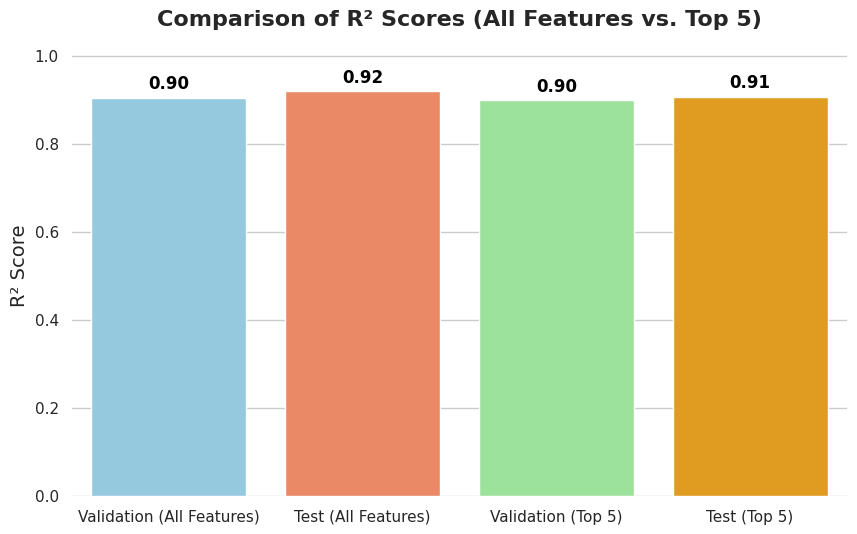

Basically, this code tries to make the model simpler and possibly more efficient by focusing on the most important features. It checks if using just
these top features can perform as well as or better than using all the features.


In [28]:
# Select the top 5 features for retraining
X_top_5_train = X_train[top_5_features.index]
X_top_5_val = X_valid[top_5_features.index]
X_top_5_test = X_test[top_5_features.index]

# Retrain the model using the top 5 features
ridge_top_5 = Ridge(alpha=best_alpha)
ridge_top_5.fit(X_top_5_train, y_train)

# Evaluate on validation and test sets
y_top_5_val_pred = ridge_top_5.predict(X_top_5_val)
y_top_5_test_pred = ridge_top_5.predict(X_top_5_test)

val_r2_top_5 = r2_score(y_valid, y_top_5_val_pred)
test_r2_top_5 = r2_score(y_test, y_top_5_test_pred)

data = {
    'Dataset': ['Validation (All Features)', 'Test (All Features)', 'Validation (Top 5)', 'Test (Top 5)'],
    'R² Score': [max(validation_r2_scores), test_r2, val_r2_top_5, test_r2_top_5]
}

results_df = pd.DataFrame(data)
display(results_df)

import seaborn as sns

# Visualization: Comparison of R² scores using all features and top 5 features
plt.figure(figsize=(10, 6))

# Define custom colors for the bars
colors = ['skyblue', 'coral', 'lightgreen', 'orange']

# Create the bar plot using Seaborn for better aesthetics
ax = sns.barplot(x=['Validation (All Features)', 'Test (All Features)',
                   'Validation (Top 5)', 'Test (Top 5)'],
                 y=[max(validation_r2_scores), test_r2,
                   val_r2_top_5, test_r2_top_5],
                 hue=['Validation (All Features)', 'Test (All Features)',
                   'Validation (Top 5)', 'Test (Top 5)'],
                 palette=colors, legend=False)

plt.title('Comparison of R² Scores (All Features vs. Top 5)', fontsize=16, fontweight='bold')
plt.ylabel('R² Score', fontsize=14)

# Add value labels to each bar with improved formatting
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 1.05)  # Set y-axis limits for better visualization
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

plt.show()
print('Basically, this code tries to make the model simpler and possibly more efficient by focusing on the most important features. It checks if using just')
print('these top features can perform as well as or better than using all the features.')

# Guide Questions

**What is the impact of removing certain features on the model’s performance?**

-The impact of feature removal on a model can vary—it may improve, degrade, or have minimal effect on performance. Eliminating redundant or irrelevant features can enhance the model's simplicity and efficiency. However, removing critical features may reduce its accuracy. The outcome ultimately depends on the dataset and the significance of the features in driving predictions..

**Why is it necessary to split the data into training, validation, and testing sets? What could happen
if this step is skipped?**

-Splitting the dataset is a critical step to ensure the model learns generalized patterns rather than simply memorizing the training data. Without distinct training, validation, and testing subsets, the model is prone to overfitting, resulting in strong performance on the training data but poor generalization to unseen data. Furthermore, the absence of separate data subsets impedes effective hyperparameter optimization and prevents accurate assessment of the model’s real-world performance. Therefore, proper data partitioning is indispensable for developing a reliable and robust model.

**How can the generalization ability of the model be assessed using the test data? What steps would
you take to ensure the model generalizes well to unseen data?**

-The model's generalization capability is assessed by evaluating its performance on test data using metrics such as the R² score. A high R² score on the test data indicates strong generalization. To enhance generalization, it is important to utilize a large and diverse dataset, apply regularization techniques, perform cross-validation, and prevent overfitting during training. Through thorough testing and refinement, the model is more likely to perform effectively on new, unseen data.